<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/Car_Prices_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [94]:
#Cambiamos el tema de los gráficos
sns.set_theme(style='whitegrid', palette='bright', font='sans-serif')

In [95]:
#Leemos el archivo
df = pd.read_csv('/content/CarPrice_Assignment.csv')

In [96]:
#Revisamos el tamaño del dataset
print('Tamaño del dataset: ',df.size)
print('Filas, columnas: ',df.shape)

Tamaño del dataset:  5330
Filas, columnas:  (205, 26)


In [97]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [98]:
#Eliminaremos el campo car_ID
df=df.drop('car_ID', axis=1)

In [99]:
#Revisamos valores únicos:
df.nunique()

symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [101]:
df.columns


Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#**Descripción Variables**
- **symboling**: Clasificación de riesgo (o simbolización de riesgo)
- **CarName**: Nombre del automóvil
- **fueltype**: Tipo de combustible
- **aspiration**: Aspiración (referido al tipo de sistema de admisión del motor, como atmosférico o turbo)
- **doornumber**: Número de puertas
- **carbody**: Tipo de carrocería
- **drivewheel**: Tipo de tracción (tracción delantera, trasera o en las cuatro ruedas)
- **enginelocation**: Ubicación del motor (frontal o trasera)
- **wheelbase**: Distancia entre ejes
- **carlength**: Longitud del automóvil
- **carwidth**: Ancho del automóvil
- **carheight**: Altura del automóvil
- **curbweight**: Peso en vacío (o peso en orden de marcha)
- **enginetype**: Tipo de motor
- **cylindernumber**: Número de cilindros
- **enginesize**: Tamaño del motor
- **fuelsystem**: Sistema de combustible
- **boreratio**: Relación de diámetro de cilindro
- **stroke**: Carrera (del pistón)
- **compressionratio**: Relación de compresión
- **horsepower**: Potencia del motor (en caballos de fuerza)
- **peakrpm**: RPM máximas
- **citympg**: Consumo de combustible en ciudad (en millas por galón)
- **highwaympg**: Consumo de combustible en carretera (en millas por galón)
- **price**: Precio

In [102]:
list(zip(pd.unique(df['CarName'])))

[('alfa-romero giulia',),
 ('alfa-romero stelvio',),
 ('alfa-romero Quadrifoglio',),
 ('audi 100 ls',),
 ('audi 100ls',),
 ('audi fox',),
 ('audi 5000',),
 ('audi 4000',),
 ('audi 5000s (diesel)',),
 ('bmw 320i',),
 ('bmw x1',),
 ('bmw x3',),
 ('bmw z4',),
 ('bmw x4',),
 ('bmw x5',),
 ('chevrolet impala',),
 ('chevrolet monte carlo',),
 ('chevrolet vega 2300',),
 ('dodge rampage',),
 ('dodge challenger se',),
 ('dodge d200',),
 ('dodge monaco (sw)',),
 ('dodge colt hardtop',),
 ('dodge colt (sw)',),
 ('dodge coronet custom',),
 ('dodge dart custom',),
 ('dodge coronet custom (sw)',),
 ('honda civic',),
 ('honda civic cvcc',),
 ('honda accord cvcc',),
 ('honda accord lx',),
 ('honda civic 1500 gl',),
 ('honda accord',),
 ('honda civic 1300',),
 ('honda prelude',),
 ('honda civic (auto)',),
 ('isuzu MU-X',),
 ('isuzu D-Max ',),
 ('isuzu D-Max V-Cross',),
 ('jaguar xj',),
 ('jaguar xf',),
 ('jaguar xk',),
 ('maxda rx3',),
 ('maxda glc deluxe',),
 ('mazda rx2 coupe',),
 ('mazda rx-4',),
 (

In [103]:
#Ajustamos columna CarName
ajuste = df['CarName'].str.split(" ", expand=True)
ajuste

,0,1,2,3,4
0,alfa-romero,giulia,None,None,None
1,alfa-romero,stelvio,None,None,None
2,alfa-romero,Quadrifoglio,None,None,None
3,audi,100,ls,None,None
4,audi,100ls,None,None,None
...,...,...,...,...,...
200,volvo,145e,(sw),None,None
201,volvo,144ea,None,None,None
202,volvo,244dl,None,None,None
203,volvo,246,None,None,None


In [104]:
df['CarName'] = ajuste[0].values

In [105]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [106]:
list(zip(df['CarName'].unique()))

[('alfa-romero',),
 ('audi',),
 ('bmw',),
 ('chevrolet',),
 ('dodge',),
 ('honda',),
 ('isuzu',),
 ('jaguar',),
 ('maxda',),
 ('mazda',),
 ('buick',),
 ('mercury',),
 ('mitsubishi',),
 ('Nissan',),
 ('nissan',),
 ('peugeot',),
 ('plymouth',),
 ('porsche',),
 ('porcshce',),
 ('renault',),
 ('saab',),
 ('subaru',),
 ('toyota',),
 ('toyouta',),
 ('vokswagen',),
 ('volkswagen',),
 ('vw',),
 ('volvo',)]

In [107]:
df['CarName'] = df['CarName'].replace({
                             'toyouta': 'toyota'
                            ,'vw':'volkswagen'
                            ,'vokswagen':'volkswagen'
                            ,'maxda':'mazda'
                            ,'porcshce':'porsche'
                            ,'Nissan':'nissan'
                                    })

In [108]:
df['CarName'].value_counts()

CarName
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

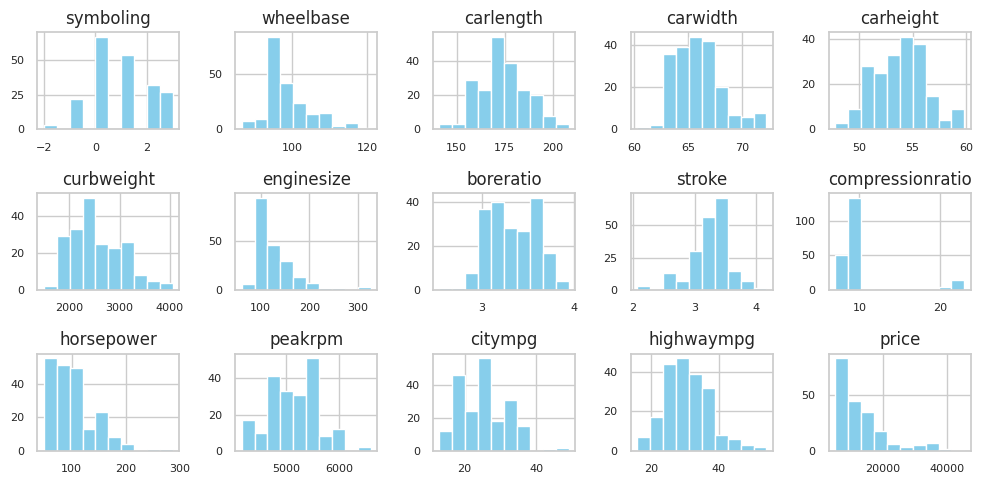

In [109]:
#Histograma de variables numéricas
df.hist(xlabelsize=8, ylabelsize=8, figsize=(10,5), color='skyblue', layout=(3,5))
plt.tight_layout()
plt.show()

In [110]:
#Resumen estadístico con valores redondeados a 2 decimales
df.describe().round(2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [111]:
#Revisamos si hay valores nulos
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

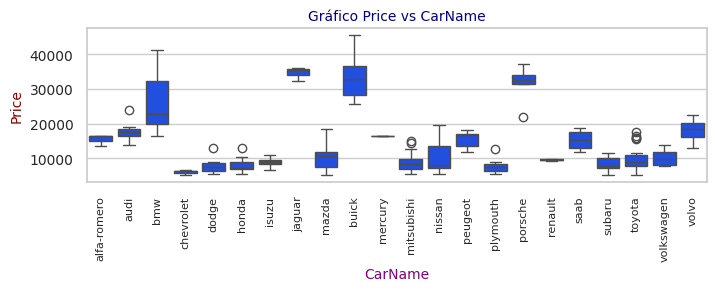

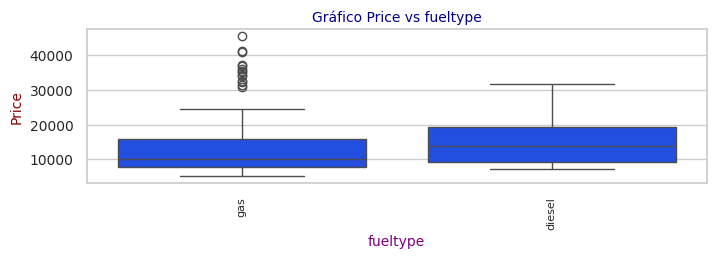

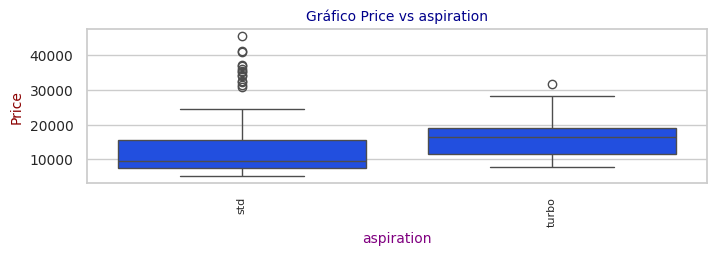

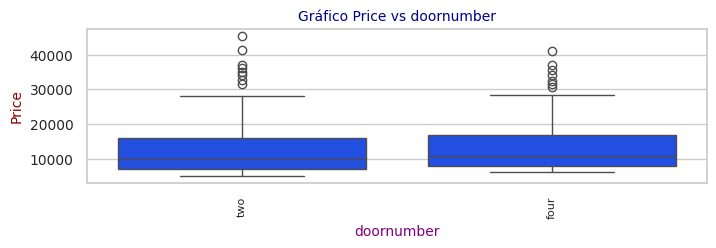

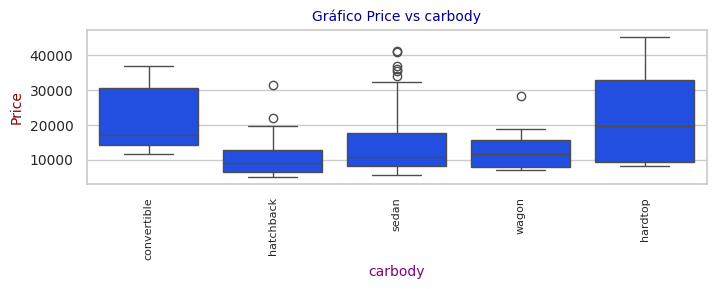

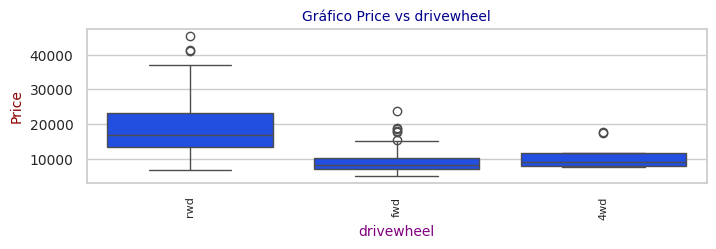

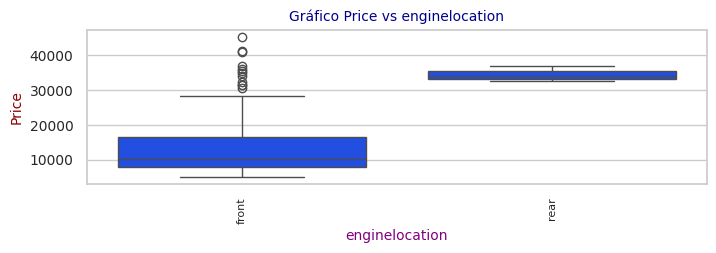

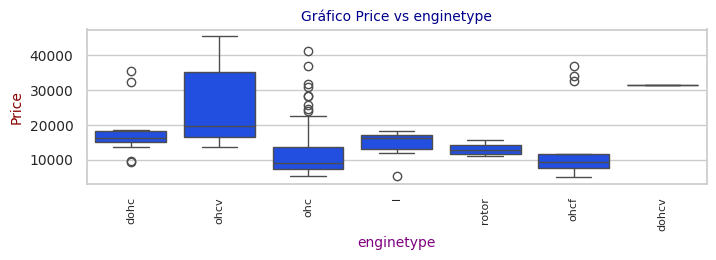

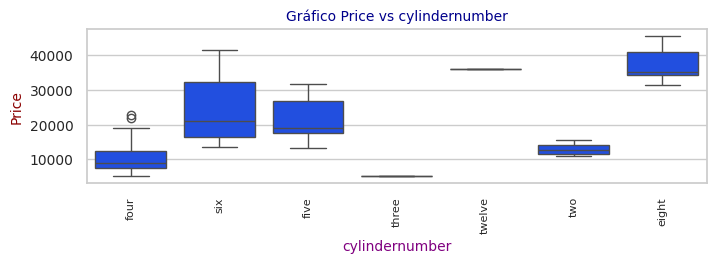

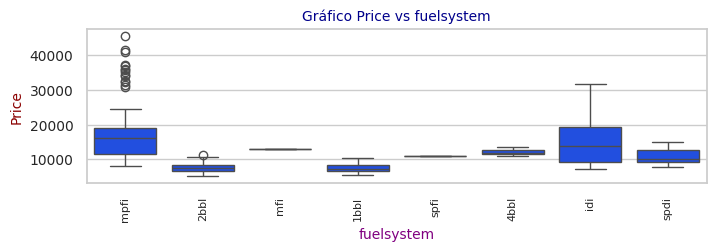

In [112]:
#Boxplot variables categóricas

for i in df.columns:
  if df[i].dtype=='object':
    plt.figure(figsize=(8,2))
    plt.title(f'Gráfico Price vs {i}', fontsize=10, color='darkblue')
    plt.ylabel('Price', fontsize=10, color='darkred');
    plt.xlabel(i, fontsize=10, color='purple');
    plt.xticks(rotation=90, fontsize = 8)
    plt.yticks(fontsize = 10)
    sns.boxplot(x=df[i], y=df['price'],data=df)
    plt.show()

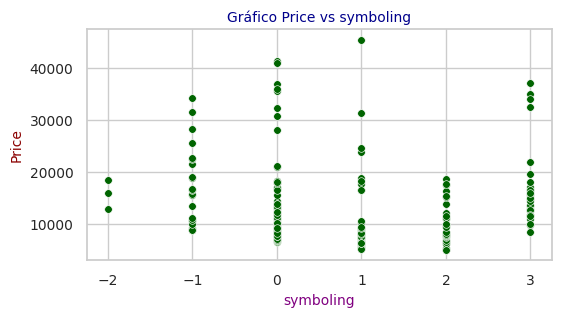

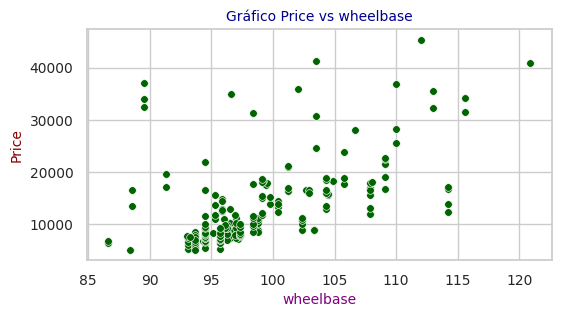

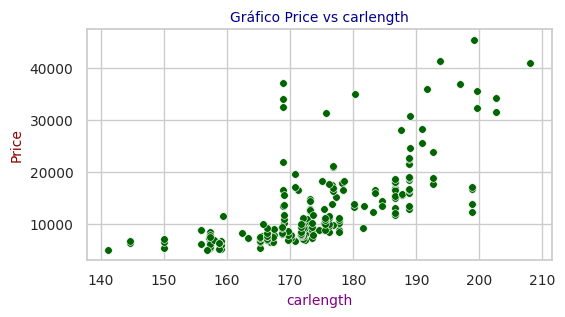

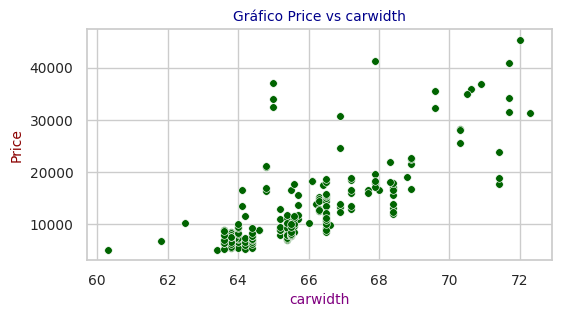

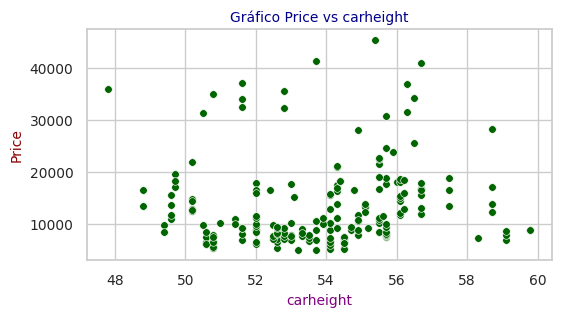

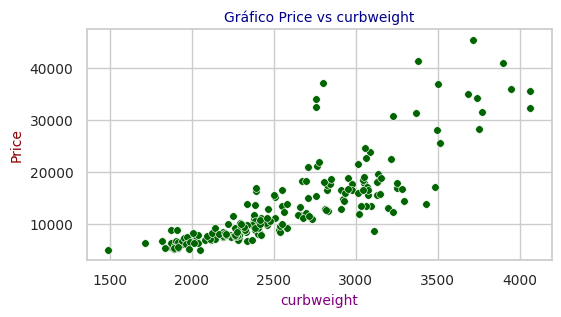

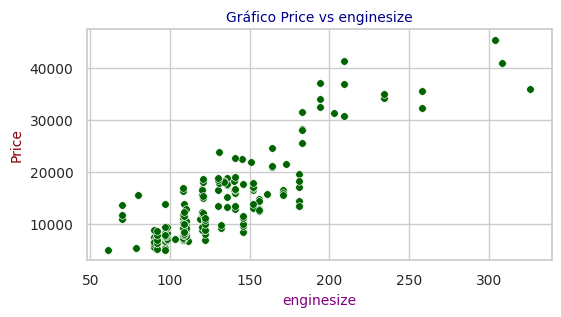

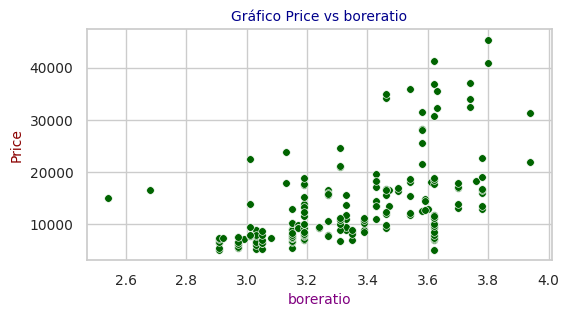

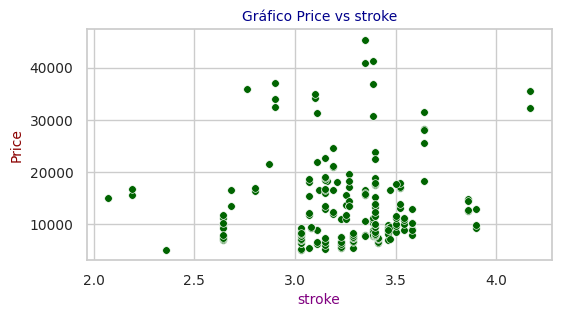

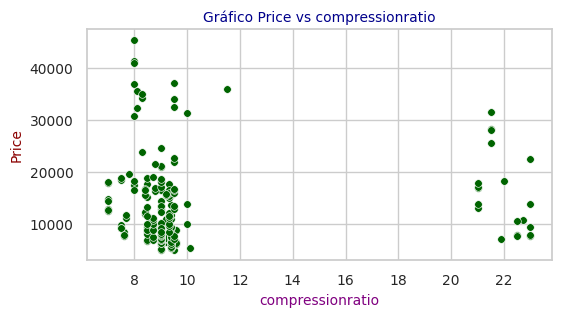

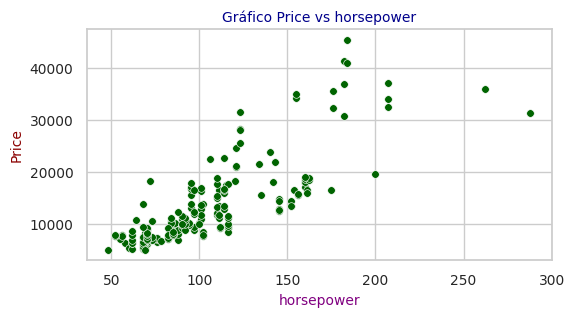

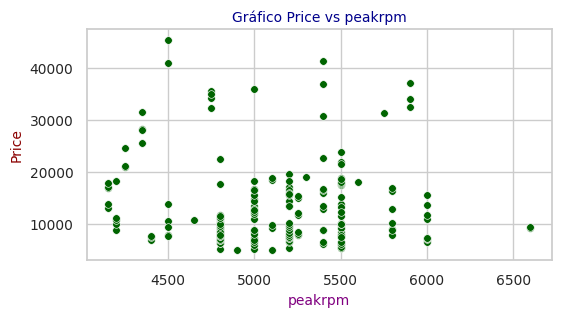

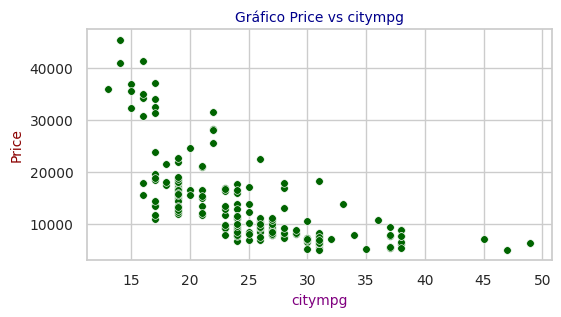

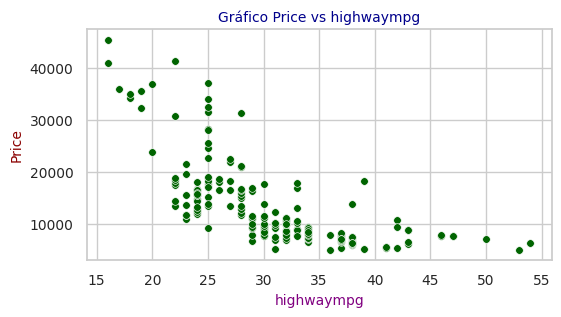

In [113]:
#Boxplot variables numéricas (sin incluir precio)

for i in df.columns:
  if (df[i].dtype=='float64' or df[i].dtype=='int64') and i!='price':
    plt.figure(figsize=(6,3))
    plt.title(f'Gráfico Price vs {i}', fontsize=10, color='darkblue')
    plt.ylabel('Price', fontsize=10, color='darkred');
    plt.xlabel(i, fontsize=10, color='purple');
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    sns.scatterplot(x=df[i], y=df['price'],data=df, s=30, color='darkgreen')
    plt.show()

# **MODELO DE REGRESIÓN LINEAL**

In [114]:
#Seleccionamos las variables numéricas del set de datos:
df_numericas = df.select_dtypes(include=['float64','int64'])
df_numericas.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [115]:
#Seleccionamos las variables categóricas del set de datos:
df_categoricas = df.select_dtypes(include=['object'])
df_categoricas.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [127]:
df_categoricas.nunique()

CarName           22
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
dtype: int64

In [128]:
df_categoricas.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


Tendremos entonces n-1 variables dummies por cada feature

In [131]:
#Para evitar trampa Dummy!
#drop_first=True
df_dummies_new = pd.get_dummies(df_categoricas, drop_first=True).astype(int)

In [132]:
df_dummies_new.head()

,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [133]:
list(df_dummies_new.columns)

['CarName_audi',
 'CarName_bmw',
 'CarName_buick',
 'CarName_chevrolet',
 'CarName_dodge',
 'CarName_honda',
 'CarName_isuzu',
 'CarName_jaguar',
 'CarName_mazda',
 'CarName_mercury',
 'CarName_mitsubishi',
 'CarName_nissan',
 'CarName_peugeot',
 'CarName_plymouth',
 'CarName_porsche',
 'CarName_renault',
 'CarName_saab',
 'CarName_subaru',
 'CarName_toyota',
 'CarName_volkswagen',
 'CarName_volvo',
 'fueltype_gas',
 'aspiration_turbo',
 'doornumber_two',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_rear',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_three',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi']

**Unimos dataframe numérico + dummy**


In [135]:
#Concatenamos datos numericos con dummies
dt = pd.concat([df_dummies_new,df_numericas], axis=1)

# **Regresión Lineal con Statsmodels**

In [137]:
#Separamos las variables predictoras de la variable dependiente
X = dt.drop(['price'], axis=1).values
Y = dt['price'].values

In [138]:
#Importamos librería para el modelo de regresión
import statsmodels.api as sm
from statsmodels.api import add_constant

In [139]:
#Regresión Lineal
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [140]:
#Error Cuadrático Medio de la Regresión Lineal
print(f'MSE Regresión Lineal: {results.mse_resid}')

MSE Regresión Lineal: 3045019.0830468177


In [141]:
#Visualizamos el ajuste:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     68.86
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           6.09e-82
Time:                        22:28:40   Log-Likelihood:                -1784.9
No. Observations:                 205   AIC:                             3692.
Df Residuals:                     144   BIC:                             3895.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.822e+04   1.03e+04     -1.774      0.0

Creamos un dataframe para manipular los resultados de la regresión

In [142]:
#Creamos un dataframe con los resultados del summary:
coef_df = pd.DataFrame(results.summary().tables[1].data)
#Cambiamos el nombre de las columnas en base a la primera fila (iloc[0]):
coef_df.columns = coef_df.iloc[0]
#Eliminamos la primera fila que contenía el nombre de las columnas:
coef_df = coef_df.drop(0)
#Cambiamos el nombre la 1ra columna:
coef_df.rename(columns={'':'variable'}, inplace=True)
#Eliminamos el intercepto:
coef_df = coef_df.drop(1)

In [143]:
#Los datos del dataframe vienen todos en formato texto
coef_df.dtypes

0
variable    object
coef        object
std err     object
t           object
P>|t|       object
[0.025      object
0.975]      object
dtype: object

In [144]:
coef_df.columns

Index(['variable', 'coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]'], dtype='object', name=0)

In [145]:
#Cambiamos el tipo texto a numérico
coef_df['coef'] = coef_df['coef'].astype('float64')
coef_df['std err'] = coef_df['std err'].astype('float64')
coef_df['t'] = coef_df['t'].astype('float64')
coef_df['P>|t|'] = coef_df['P>|t|'].astype('float64')
coef_df['[0.025'] = coef_df['[0.025'].astype('float64')
coef_df['0.975]'] = coef_df['0.975]'].astype('float64')

In [146]:
coef_df

,variable,coef,std err,t,P>|t|,[0.025,0.975]
2,x1,534.2240,2298.493,0.232,0.817,-4008.920,5077.368
3,x2,5267.8558,2314.119,2.276,0.024,693.826,9841.885
4,x3,1750.0367,2494.219,0.702,0.484,-3179.975,6680.048
5,x4,-5224.3419,2215.419,-2.358,0.020,-9603.284,-845.400
6,x5,-5940.8182,1828.024,-3.250,0.001,-9554.044,-2327.592
...,...,...,...,...,...,...,...
61,x60,-801.7986,487.495,-1.645,0.102,-1765.370,161.773
62,x61,-3.9024,23.875,-0.163,0.870,-51.093,43.289
63,x62,2.3955,0.644,3.721,0.000,1.123,3.668
64,x63,-7.2882,133.601,-0.055,0.957,-271.360,256.784


Graficamos los Valores-P de la regresión

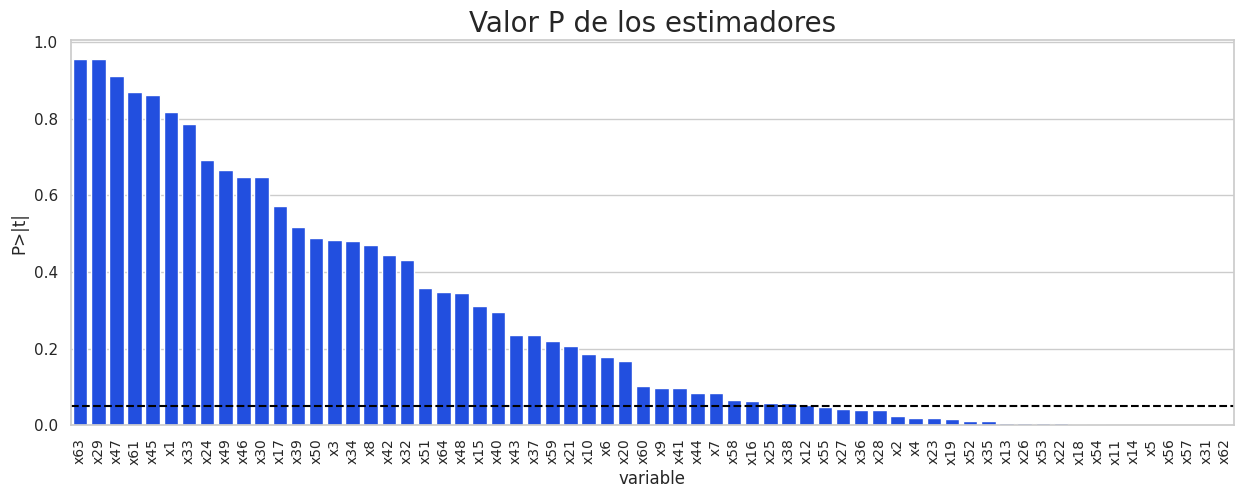

In [147]:
#Graficamos valor-p
fig, ax = plt.subplots(figsize=(15,5))
coef_df = coef_df.sort_values(by='P>|t|', ascending=False)
ax = sns.barplot(x='variable', y='P>|t|', data=coef_df)
ax.set_title('Valor P de los estimadores', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
#Añadimos una línea con el valor 0.05
plt.axhline(y = 0.05, color='black', linestyle='--')
plt.show()

Por lo tanto, mi regresión es:
Y =

# **Regresión Polinómica**

In [148]:
from sklearn.preprocessing import PolynomialFeatures

In [149]:
df_numericas.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [150]:
df_numericas=df_numericas.drop(['price'], axis=1)

In [151]:
df_numericas

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [152]:
#Polinomio grado 2
poly_feats = PolynomialFeatures(degree=2)
X_poly_num = poly_feats.fit_transform(df_numericas)

In [153]:
X_poly_num

array([[  1. ,   3. ,  88.6, ..., 441. , 567. , 729. ],
       [  1. ,   3. ,  88.6, ..., 441. , 567. , 729. ],
       [  1. ,   1. ,  94.5, ..., 361. , 494. , 676. ],
       ...,
       [  1. ,  -1. , 109.1, ..., 324. , 414. , 529. ],
       [  1. ,  -1. , 109.1, ..., 676. , 702. , 729. ],
       [  1. ,  -1. , 109.1, ..., 361. , 475. , 625. ]])

In [155]:
import re
def PolynomialFeatureNames(sklearn_feature_name_output, df):
  '''
This function takes the output from the .get_feature_names() method on the PolynomialFeatures
instance and replaces values with df column names to return output such as 'Col_1 x Col_2'

sklearn_feature_name_output: The list object returned when calling .get_feature_names() on the PolynomialFeatures object
df: Pandas dataframe with correct column names
'''
  cols = df.columns.tolist()
  feat_map = {'x'+str(num):cat for num, cat in enumerate(cols)}
  feat_string = ','.join(sklearn_feature_name_output)
  for k,v in feat_map.items():
    feat_string = re.sub(fr"\b{k}\b",v,feat_string)
  return feat_string.replace(" "," x ").split(',')

In [156]:
names = PolynomialFeatureNames(poly_feats.get_feature_names_out(),df_numericas)
df_num_poly=pd.DataFrame(X_poly_num, columns= names)
df_num_poly.head()

,1,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,horsepower^2,horsepower x peakrpm,horsepower x citympg,horsepower x highwaympg,peakrpm^2,peakrpm x citympg,peakrpm x highwaympg,citympg^2,citympg x highwaympg,highwaympg^2
0,1.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,12321.0,555000.0,2331.0,2997.0,25000000.0,105000.0,135000.0,441.0,567.0,729.0
1,1.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,12321.0,555000.0,2331.0,2997.0,25000000.0,105000.0,135000.0,441.0,567.0,729.0
2,1.0,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,23716.0,770000.0,2926.0,4004.0,25000000.0,95000.0,130000.0,361.0,494.0,676.0
3,1.0,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,10404.0,561000.0,2448.0,3060.0,30250000.0,132000.0,165000.0,576.0,720.0,900.0
4,1.0,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,13225.0,632500.0,2070.0,2530.0,30250000.0,99000.0,121000.0,324.0,396.0,484.0


In [157]:
print(df_dummies_new.shape)
print(df_num_poly.shape)

(205, 50)
(205, 120)


In [ ]:
#df_dummies_new=df_dummies_new.reset_index()

In [158]:
df_dummies_new.head()

,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [159]:
df_num_poly.head()

,1,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,horsepower^2,horsepower x peakrpm,horsepower x citympg,horsepower x highwaympg,peakrpm^2,peakrpm x citympg,peakrpm x highwaympg,citympg^2,citympg x highwaympg,highwaympg^2
0,1.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,12321.0,555000.0,2331.0,2997.0,25000000.0,105000.0,135000.0,441.0,567.0,729.0
1,1.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,12321.0,555000.0,2331.0,2997.0,25000000.0,105000.0,135000.0,441.0,567.0,729.0
2,1.0,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,23716.0,770000.0,2926.0,4004.0,25000000.0,95000.0,130000.0,361.0,494.0,676.0
3,1.0,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,10404.0,561000.0,2448.0,3060.0,30250000.0,132000.0,165000.0,576.0,720.0,900.0
4,1.0,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,13225.0,632500.0,2070.0,2530.0,30250000.0,99000.0,121000.0,324.0,396.0,484.0


In [160]:
#dt_poly no contiene la variable price
dt_poly = pd.concat([df_dummies_new,df_num_poly], axis=1)
print(dt_poly.shape)
dt_poly.head()

(205, 170)


,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,horsepower^2,horsepower x peakrpm,horsepower x citympg,horsepower x highwaympg,peakrpm^2,peakrpm x citympg,peakrpm x highwaympg,citympg^2,citympg x highwaympg,highwaympg^2
0,0,0,0,0,0,0,0,0,0,0,...,12321.0,555000.0,2331.0,2997.0,25000000.0,105000.0,135000.0,441.0,567.0,729.0
1,0,0,0,0,0,0,0,0,0,0,...,12321.0,555000.0,2331.0,2997.0,25000000.0,105000.0,135000.0,441.0,567.0,729.0
2,0,0,0,0,0,0,0,0,0,0,...,23716.0,770000.0,2926.0,4004.0,25000000.0,95000.0,130000.0,361.0,494.0,676.0
3,1,0,0,0,0,0,0,0,0,0,...,10404.0,561000.0,2448.0,3060.0,30250000.0,132000.0,165000.0,576.0,720.0,900.0
4,1,0,0,0,0,0,0,0,0,0,...,13225.0,632500.0,2070.0,2530.0,30250000.0,99000.0,121000.0,324.0,396.0,484.0


In [161]:
#Separamos las variables predictoras de la variable dependiente
X_poly = dt_poly
Y = dt['price']

In [162]:
print(X_poly.shape)
print(Y.shape)

(205, 170)
(205,)


In [163]:
#Generamos el modelo
model = sm.OLS(Y, X_poly)
results_poly = model.fit()

In [164]:
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     100.0
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.60e-31
Time:                        22:30:08   Log-Likelihood:                -1512.3
No. Observations:                 205   AIC:                             3357.
Df Residuals:                      39   BIC:                             3908.
Df Model:                         165                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
CarName_audi  

In [165]:
#Creamos una función para tomar los resultados como un dataframe:
def coef_summary(results):
  '''
  Toma los datos del modelo y los transforma a un dataframe
  '''
  coef_df = pd.DataFrame(results.summary().tables[1].data)
  coef_df.columns = coef_df.iloc[0]
  coef_df = coef_df.drop(0)
  coef_df = coef_df.drop(1)
  coef_df.rename(columns={'':'variable'}, inplace=True)
  coef_df['coef'] = coef_df['coef'].astype('float64')
  coef_df['std err'] = coef_df['std err'].astype('float64')
  coef_df['t'] = coef_df['t'].astype('float64')
  coef_df['P>|t|'] = coef_df['P>|t|'].astype('float64')
  coef_df['[0.025'] = coef_df['[0.025'].astype('float64')
  coef_df['0.975]'] = coef_df['0.975]'].astype('float64')
  coef_df.dropna()

  return coef_df

In [166]:
#Creamos la variable con los resultados como dataframe
coef_df_poly = coef_summary(results_poly)
coef_df_poly

,variable,coef,std err,t,P>|t|,[0.025,0.975]
2,CarName_bmw,-7910.3528,33000.000,-0.240,0.812,-74700.000,58900.000
3,CarName_buick,12750.0000,80000.000,0.159,0.874,-149000.000,175000.000
4,CarName_chevrolet,334.5984,38600.000,0.009,0.993,-77700.000,78400.000
5,CarName_dodge,5090.1806,40400.000,0.126,0.900,-76500.000,86700.000
6,CarName_honda,1062.7833,41000.000,0.026,0.979,-81800.000,83900.000
...,...,...,...,...,...,...,...
166,peakrpm x citympg,-7.0309,4.686,-1.500,0.142,-16.510,2.448
167,peakrpm x highwaympg,4.7538,3.195,1.488,0.145,-1.708,11.215
168,citympg^2,-411.5135,888.324,-0.463,0.646,-2208.318,1385.291
169,citympg x highwaympg,918.4764,1216.271,0.755,0.455,-1541.664,3378.617


In [167]:
#Error Cuadrático Medio de las Regresiones
print(f'MSE Regresión Lineal: {round(results.mse_resid,1)}')
print(f'MSE Regresión Polynomial: {round(results_poly.mse_resid,1)}')

MSE Regresión Lineal: 3045019.1
MSE Regresión Polynomial: 786916.8


# **Transformación Escalar Datos**

In [168]:
#Importamos libreríara para escalar datos
from sklearn.preprocessing import StandardScaler

In [169]:
df_numericas.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [170]:
#Transformación variables numéricas
scaler = StandardScaler()
scaled = scaler.fit_transform(df_numericas)

In [171]:
dt_scaled_num = pd.DataFrame(scaled, columns=df_numericas.columns)

In [172]:
#dt_scaled_num no contenga la variable price
dt_scaled_num.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900


In [173]:
#concatenamos con dummies
dt_scaled_total = pd.concat([df_dummies_new,dt_scaled_num], axis=1)
print(dt_scaled_total.shape)
dt_scaled_total.head()

(205, 64)


,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,0,0,0,0,0,0,0,0,0,...,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,0,0,0,0,0,0,0,0,0,0,...,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,0,0,0,0,0,0,0,0,0,0,...,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,1,0,0,0,0,0,0,0,0,0,...,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,1,0,0,0,0,0,0,0,0,0,...,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900


In [174]:
dt_scaled_total.shape

(205, 64)

In [175]:
#Generamos el conjunto de datos para ajustar el modelo
X = dt_scaled_total
Y = dt['price']

In [176]:
#Construimos el modelo
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results_scaled = model.fit()

In [177]:
#Error Cuadrático Medio de las Regresiones
print(f'MSE Regresión Lineal: {round(results.mse_resid,1)}')
print(f'MSE Regresión Polynomial: {round(results_poly.mse_resid,1)}')
print(f'MSE Regresión Escalada: {round(results_scaled.mse_resid,1)}')

MSE Regresión Lineal: 3045019.1
MSE Regresión Polynomial: 786916.8
MSE Regresión Escalada: 3045019.1


In [178]:
#Visualizamos el ajuste:
print(results_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     68.86
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           6.09e-82
Time:                        22:31:07   Log-Likelihood:                -1784.9
No. Observations:                 205   AIC:                             3692.
Df Residuals:                     144   BIC:                             3895.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.543e+

In [179]:
coef_df = coef_summary(results_scaled)

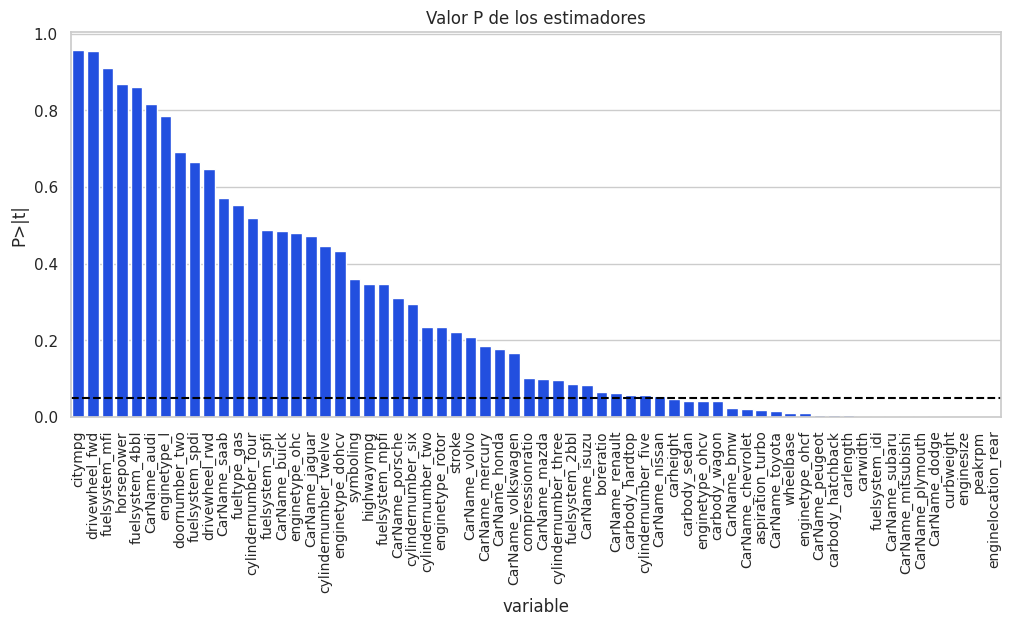

In [180]:
#Graficamos valor-p
fig, ax = plt.subplots(figsize=(12,5))
coef_df = coef_df.sort_values(by='P>|t|', ascending=False)
ax = sns.barplot(x='variable', y='P>|t|', data=coef_df)
ax.set_title('Valor P de los estimadores')
plt.xticks(rotation=90, fontsize=10)
#Añadimos una línea con el valor 0.05
plt.axhline(y = 0.05, color='black', linestyle='--')
plt.show()

# **Librería para dividir el set de datos**

In [181]:
#Importamos la función train_test_split
from sklearn.model_selection import train_test_split

In [182]:
X.head()

,const,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.0,0,0,0,0,0,0,0,0,0,...,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,1.0,0,0,0,0,0,0,0,0,0,...,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,1.0,0,0,0,0,0,0,0,0,0,...,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,1.0,1,0,0,0,0,0,0,0,0,...,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,1.0,1,0,0,0,0,0,0,0,0,...,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900


In [183]:
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [184]:
print('X.shape :',X.shape)
print('Y.shape :',Y.shape)

X.shape : (205, 65)
Y.shape : (205,)


In [186]:
#Separamos el conjunto de datos en entrenamiento y testeo
#test_size: indica el porcentaje del set de datos que se iran a testeo,
#luego de haber entrenado el modelo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# **Regularización Lasso**
Min (Error + Lambda*Abs(betas))

En python: Lambda = alphas

In [187]:
#Importamos librería
from sklearn.linear_model import Lasso

In [188]:
#Ajustamos el modelo para distintos valores de lambda
#Nuestro lambda
n_alphas = 50
alphas = np.logspace(-3, 3, n_alphas)

coefs = []
for a in alphas:
  lasso = Lasso(alpha=a, fit_intercept=False)
  lasso.fit(X_train, Y_train)
  coefs.append(lasso.coef_)

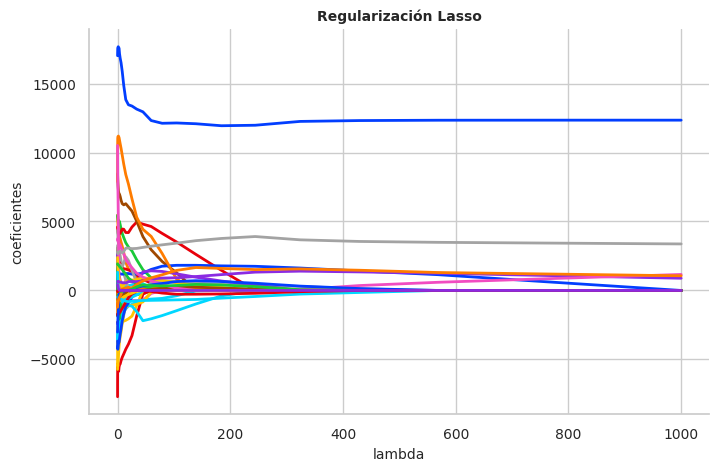

In [189]:
#Graficamos la regularización Lasso
fig, ax = plt.subplots(figsize=(8,5))
l1 = plt.plot(alphas, coefs, linewidth=2)

ax.set_title('Regularización Lasso', fontweight='bold', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('coeficientes', fontsize=10)
ax.set_xlabel('lambda', fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [190]:
coeficientes = pd.DataFrame(coefs, columns = X_train.columns)

In [191]:
coeficientes.shape

(50, 65)

In [192]:
variables_importantes = coeficientes.loc[:, X_train.columns[coeficientes.loc[45:].any().values]]

In [193]:
#Cross Validation para Lasso
from sklearn.linear_model import LassoCV

In [194]:
#Validación con 20 bloques del set de entrenamiento
lasso = LassoCV(cv=20).fit(X_train, Y_train)

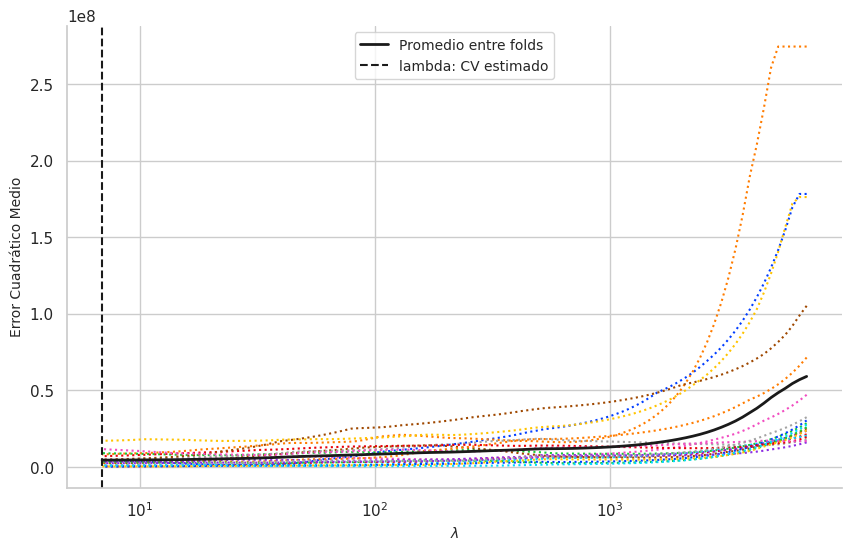

In [195]:
#Graficamos el error cuadrático medio
EPSILON = 1e-3
fig, ax = plt.subplots(figsize=(10,6))
plt.semilogx(lasso.alphas_ + EPSILON, lasso.mse_path_, ':')
l1 = plt.plot(lasso.alphas_ + EPSILON, lasso.mse_path_.mean(axis=-1), 'k', label='Promedio entre folds', linewidth=2)
ax.axvline(lasso.alpha_ + EPSILON, linestyle='--', color='k', label='lambda: CV estimado')
ax.legend(fontsize=10)

ax.set_xlabel(r'$\lambda$', fontsize=10)
ax.set_ylabel('Error Cuadrático Medio', fontsize=10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [196]:
#Encontramos el lambda óptimo
print(f'El lambda final obtenido mediante Cross Validation es: {lasso.alpha_}')
round(lasso.alpha_,2)

El lambda final obtenido mediante Cross Validation es: 6.908870782877257


6.91

In [197]:
#Generamos un cuadro resumen con los coeficientes
#Ojo: .T --> dataframe transpuesto
#Coeficientes = 0 --> Lasso actúa como selector de variables
coeficientes_finales = pd.DataFrame([np.array(X_train.columns.tolist()), lasso.coef_]).T
coeficientes_finales.columns = ['feature', 'coeficiente']
coeficientes_finales

,feature,coeficiente
0,const,0.0
1,CarName_audi,3170.64138
2,CarName_bmw,4326.282538
3,CarName_buick,4009.525784
4,CarName_chevrolet,-0.0
...,...,...
60,compressionratio,-189.115692
61,horsepower,-199.196125
62,peakrpm,-56.607678
63,citympg,0.0


In [198]:
coef_finales_lasso=coeficientes_finales[coeficientes_finales['coeficiente']!=0].shape[0]
coef_finales_lasso

47